# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
data = pd.read_csv("../output_data/cities.csv")
data.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [19]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

i=1

name = []
lat = []
lng = []
temp = []
humidity=[]
cloudiness=[]
wind_speed=[]

for city in cities:
    try:
        request = requests.get(f"{url}appid={weather_api_key}&units={units}&q={city}").json()
        name.append(request['name'])
        lat.append(request['coord']['lat'])
        lng.append(request['coord']['lon'])
        temp.append(request['main']['temp'])
        humidity.append(request['main']['humidity'])
        cloudiness.append(request['clouds']['all'])
        wind_speed.append(request['wind']['speed'])
    
        print(f'Processing Record {i} of Set {len(cities)}. | {city}')
        i += 1
        
    except KeyError:
        print(f'City not found. Skipping {city}...')
        i += 1
    
        
    

Processing Record 1 of Set 603. | ushuaia
Processing Record 2 of Set 603. | jamestown
Processing Record 3 of Set 603. | sitka
Processing Record 4 of Set 603. | atuona
Processing Record 5 of Set 603. | airai
Processing Record 6 of Set 603. | rikitea
City not found. Skipping aporawan...
Processing Record 8 of Set 603. | pevek
Processing Record 9 of Set 603. | butaritari
Processing Record 10 of Set 603. | banda aceh
Processing Record 11 of Set 603. | kodiak
Processing Record 12 of Set 603. | dukat
Processing Record 13 of Set 603. | vaini
Processing Record 14 of Set 603. | norman wells
Processing Record 15 of Set 603. | punta arenas
Processing Record 16 of Set 603. | nikolskoye
Processing Record 17 of Set 603. | saskylakh
Processing Record 18 of Set 603. | general roca
Processing Record 19 of Set 603. | bengkulu
Processing Record 20 of Set 603. | port alfred
Processing Record 21 of Set 603. | busselton
Processing Record 22 of Set 603. | saldanha
Processing Record 23 of Set 603. | vestmanna

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_data = pd.DataFrame({'City': name,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Temperature': temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed
                         })



In [13]:
#write to csv
city_data.to_csv("../output_data/CityDF.csv", index=False, header=True)

In [14]:
city_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.80,-68.30,8.00,65,40,4.60
1,Jamestown,42.10,-79.24,-0.35,100,90,1.50
2,Sitka,57.05,-135.33,1.90,86,1,1.87
3,Atuona,-9.80,-139.03,27.80,74,6,6.39
4,Airai,-8.93,125.41,23.99,91,72,1.14


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature')

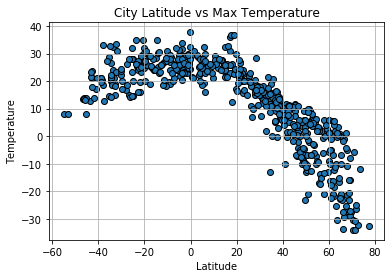

In [15]:
plt.scatter(city_data['Latitude'], city_data["Temperature"], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs Max Temperature")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

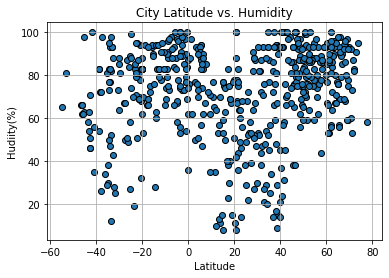

In [16]:
plt.scatter(city_data["Latitude"], city_data["Humidity"], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Hudiity(%)")
plt.title("City Latitude vs. Humidity")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness')

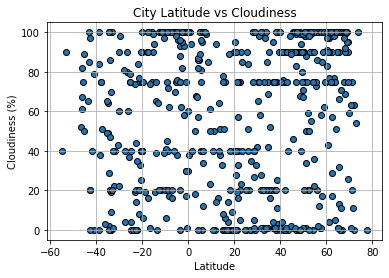

In [17]:
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed')

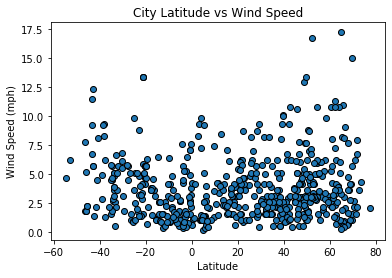

In [18]:
plt.scatter(city_data["Latitude"], city_data["Wind Speed"], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
            

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


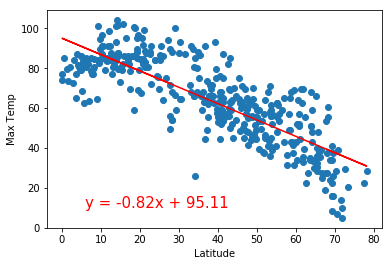

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


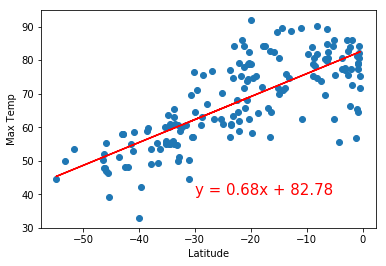

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


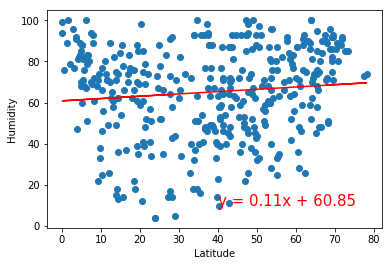

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


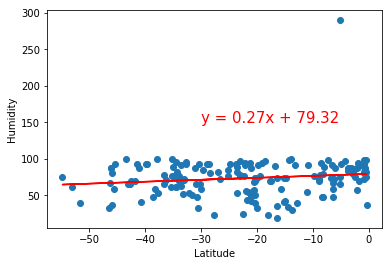

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


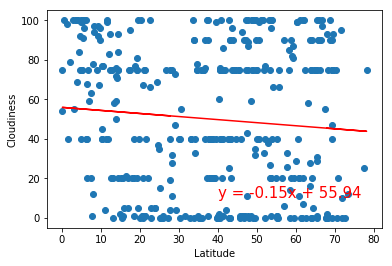

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


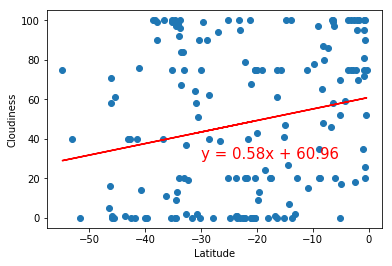

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


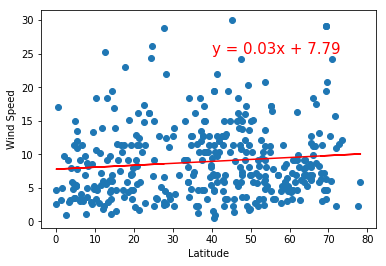

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


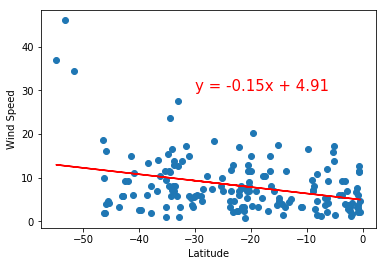